In [34]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl
import pandas as pd
# import salishsea_tools.river_202108 as rivers

## Imports

In [35]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [36]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]

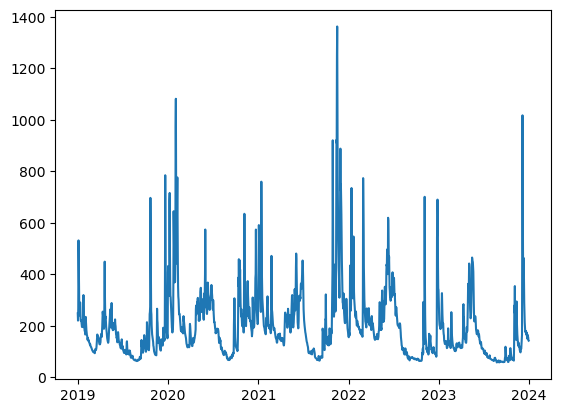

In [37]:
river_dict = {'fraser_river': 'Fraser [m^3/s]', 'nooksack_river': 'Nooksack [m^3/s]', 'skagit_river': 'Skagit1 [m^3/s]', 'snohomish_river': 'SnohomishAllenQuilceda [m^3/s]', \
              'nisqually_river': 'NisquallyMcAllister [m^3/s]', 'elwha_river': 'Elwha [m^3/s]', 'cowichan_river': 'Cowichan1 [m^3/s]', \
              'nanaimo_river': 'Nanaimo1 [m^3/s]', 'puntledge_river': 'Puntledge [m^3/s]', 'salmon_river': 'SalmonSayward [m^3/s]', 'homathko_river': 'Homathko [m^3/s]', \
              'squamish_river': 'Squamish [m^3/s]'}

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_vol_ts_all12_20190101_20231231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()
# river_flows_202108

# river_flows_202108.loc[:, (river_flows_202108.columns != 'Unnamed: 0') & (river_flows_202108.columns != 'date') & (river_flows_202108.columns != 'month') & (river_flows_202108.columns != 'dayofyear')].plot()
plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)
# plt.plot(daily_clim_202108['dayofyear'], daily_clim_202108['Skagit1 [m^3/s]'].values)

In [38]:
river_flows_202108.loc[:, (river_flows_202108.columns != 'Unnamed: 0') & (river_flows_202108.columns != 'filename') & (river_flows_202108.columns != 'month') & (river_flows_202108.columns != 'dayofyear')]

,date,Fraser [m^3/s],Nooksack [m^3/s],Skagit1 [m^3/s],SnohomishAllenQuilceda [m^3/s],NisquallyMcAllister [m^3/s],Elwha [m^3/s],Cowichan1 [m^3/s],Nanaimo1 [m^3/s],Puntledge [m^3/s],SalmonSayward [m^3/s],Homathko [m^3/s],Squamish [m^3/s]
0,2019-01-01,1450.005402,18.776036,248.193111,350.888096,102.616894,59.034722,46.418713,39.580721,59.078363,110.470741,72.415055,145.426780
1,2019-01-02,1368.052842,14.782970,219.964322,310.979068,91.862182,55.306213,39.561404,33.733569,50.350877,99.677622,73.781377,119.937339
2,2019-01-03,2938.905199,108.456555,268.794719,380.014042,94.854651,784.229678,598.695906,510.501344,761.976608,402.519825,79.018944,127.154238
3,2019-01-04,5951.393752,283.628122,531.385839,751.257619,104.379002,691.016959,482.649123,411.549542,614.280702,674.252452,81.637727,249.688841
4,2019-01-05,2462.155608,65.732951,434.701258,614.567812,99.671819,248.567251,232.621053,198.353386,296.063158,356.807795,81.751587,249.373010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2023-12-27,1512.938438,13.980466,164.715941,232.870536,92.340838,82.013820,94.395144,80.489690,120.139274,299.936695,134.679136,347.299332
1822,2023-12-28,1433.000820,10.718992,158.082916,223.492962,75.968139,82.367245,156.069737,133.078930,198.634211,663.975117,179.381087,499.973591
1823,2023-12-29,1411.926342,9.344611,154.707947,218.721530,74.951314,91.663064,125.272292,106.818291,159.437462,459.320325,167.406073,480.858592
1824,2023-12-30,1413.709048,9.460871,142.904705,202.034455,74.753419,70.863677,83.055131,70.820187,105.706531,383.896363,188.122244,478.400158


In [39]:
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [64]:
# meters_2023_mon = sum_2023_mon * (1/area)
# meters_2022_mon = sum_2022_mon * (1/area)
# meters_2021_mon = sum_2021_mon * (1/area)
# meters_2020_mon = sum_2020_mon * (1/area)
# meters_2019_mon = sum_2019_mon * (1/area)

In [41]:
river_keys = list(sum_2019_mon.keys())

In [42]:
pal_IBM7 = ['#1F5AF5', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#97C042']
pal_IBM11 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#711C32', '#97C042', '#8F4691', '#959F06', '#314527']

pal_CBF7 = ['#005AB5', '#DC3220', '#2C3458', '#A507BB', '#E69E42', '#6A8A2F', '#5A2050']

rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
# rainbow_muted = ['#7D0404', '#AB5503', '#CC9100', '#396B09', '#277780', '#151E67', '#561265']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']

# rainbow5_bright = ['#921313', '#E8AC22', '#478431', '#365AA2', '#9258B8']
# rainbow5_muted = ['#851111', '#BD601B', '#98982A', '#3F6F6A', '#6459AD']

In [43]:
# colors_list = ['#8b4513', '#008000', '#4682b4', '#4b0082', '#ff0000', '#f2be00', '#00ff00', '#00ffff', '#0000ff', '#918504', '#ff1493', '#2f4f4f', '#2f4f4f']
# lines_list = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', (5, (10, 3)), 'dotted']
# lines_list = [(0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1))]
markers_list = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '*', '+', '|', '_', 'd']

year_markers = ['o', 's', '^', 'D', 'x']
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]

# jet_list = mpl.colormaps['jet'](np.linspace(0, 1, 11))
# black_rgb = np.array([[0, 0, 0, 1]])
# colors_list2 = np.concatenate([jet_list, black_rgb, black_rgb])

# colormap = 'gnuplot'
# colors_list3 = np.concatenate([mpl.colormaps[colormap](np.linspace(0, 1, 7)), mpl.colormaps[colormap](np.linspace(0, 1, 7))])
# lines_list3 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), ]

# colors_list4 = np.concatenate([plt.cm.tab10(np.arange(6) % 10), plt.cm.tab10(np.arange(7) % 10)])
# lines_list4 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1))]

# colors_list5 = pal_IBM7[:-1] + pal_IBM7
# lines_list5 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# colors_list6 = pal_CBF7[:-1] + pal_CBF7
# lines_list6 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# # colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# lines_list7 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

colors_list8 = rainbow_bright + rainbow_muted
lines_list8 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

## Functions

In [44]:
def make_1d(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
        all_1d = all_1d + next

    return all_1d

In [45]:
def make_meters(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).mean(dim='gridY').mean('gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).mean(dim='gridY').mean('gridX')
        all_1d = all_1d + next

    return all_1d

In [46]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [85]:
def plot_river_years(riv_key):  # plots all years on top of each other to look at inter-annual comparisons
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(meters1_2019_mon['time'].dt.strftime('%m-%d'), meters1_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k')
    ax[0].plot(meters1_2020_mon['time'].dt.strftime('%m-%d'), meters1_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k')
    ax[0].plot(meters1_2021_mon['time'].dt.strftime('%m-%d'), meters1_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k')
    ax[0].plot(meters1_2022_mon['time'].dt.strftime('%m-%d'), meters1_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k')
    ax[0].plot(meters1_2023_mon['time'].dt.strftime('%m-%d'), meters1_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k')
    ax[0].legend()
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(prop_2019_mon['time'].dt.strftime('%m-%d'), prop_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k')
    ax[1].plot(prop_2020_mon['time'].dt.strftime('%m-%d'), prop_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k')
    ax[1].plot(prop_2021_mon['time'].dt.strftime('%m-%d'), prop_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k')
    ax[1].plot(prop_2022_mon['time'].dt.strftime('%m-%d'), prop_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k')
    ax[1].plot(prop_2023_mon['time'].dt.strftime('%m-%d'), prop_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k')
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

## Regions

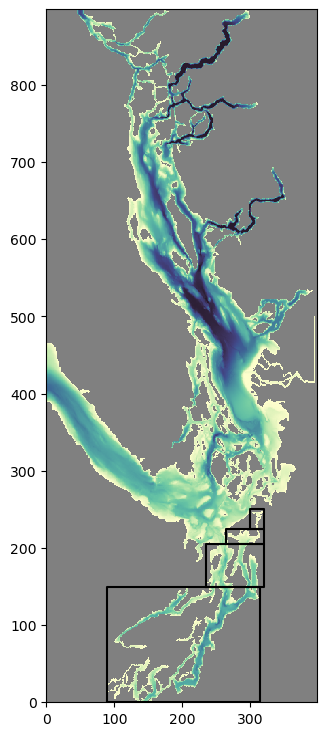

In [48]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

## Monthly

In [49]:
total_area = make_1d(area, PS_all)

In [50]:
dim1_2019_mon = make_1d(sum_2019_mon, PS_all)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
dim1_2020_mon = make_1d(sum_2020_mon, PS_all)
dim1_2021_mon = make_1d(sum_2021_mon, PS_all)
dim1_2022_mon = make_1d(sum_2022_mon, PS_all)
dim1_2023_mon = make_1d(sum_2023_mon, PS_all)
dim1_all_mon = xr.concat([dim1_2019_mon, dim1_2020_mon, dim1_2021_mon, dim1_2022_mon, dim1_2023_mon], dim='time')

In [51]:
meters1_2019_mon = dim1_2019_mon/total_area  # meters1 is the sum of all the water in the region divided by the total area of the regions. is 1d in time for each river
meters1_2020_mon = dim1_2020_mon/total_area
meters1_2021_mon = dim1_2021_mon/total_area
meters1_2022_mon = dim1_2022_mon/total_area
meters1_2023_mon = dim1_2023_mon/total_area
meters1_all_mon = xr.concat([meters1_2019_mon, meters1_2020_mon, meters1_2021_mon, meters1_2022_mon, meters1_2023_mon], dim='time')

In [52]:
totals_2019_mon = dim1_2019_mon.to_array().sum(dim="variable")  # totals is the sum of all freshwater in the region from all the rivers. 1d in time and not sep by river
totals_2020_mon = dim1_2020_mon.to_array().sum(dim="variable")
totals_2021_mon = dim1_2021_mon.to_array().sum(dim="variable")
totals_2022_mon = dim1_2022_mon.to_array().sum(dim="variable")
totals_2023_mon = dim1_2023_mon.to_array().sum(dim="variable")
totals_all_mon = xr.concat([totals_2019_mon, totals_2020_mon, totals_2021_mon, totals_2022_mon, totals_2023_mon], dim='time')

In [53]:
prop_2019_mon = dim1_2019_mon/totals_2019_mon  # prop is the dim1 volume of fw divided by all freshwater, for each river, giving pct contribution of freshwater! 1d in time for each river
prop_2020_mon = dim1_2020_mon/totals_2020_mon
prop_2021_mon = dim1_2021_mon/totals_2021_mon
prop_2022_mon = dim1_2022_mon/totals_2022_mon
prop_2023_mon = dim1_2023_mon/totals_2023_mon
prop_all_mon = xr.concat([prop_2019_mon, prop_2020_mon, prop_2021_mon, prop_2022_mon, prop_2023_mon], dim='time')

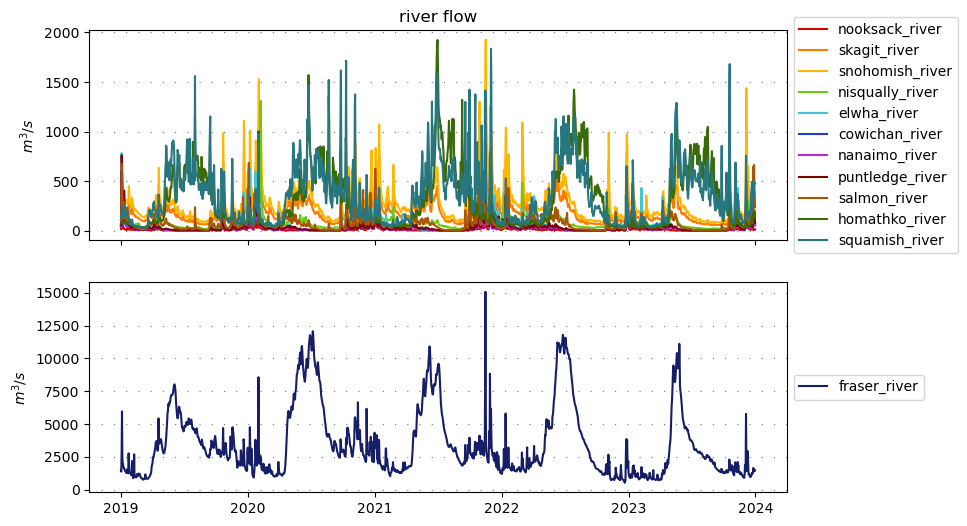

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys[:-2]:
    ax[0].plot(river_flows_202108['date'], river_flows_202108[river_dict[key]].values, label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('river flow')
    ax[0].set_ylabel(r'$m^3/s$')
    i += 1

ax[1].plot(river_flows_202108['date'], river_flows_202108[river_dict['fraser_river']].values, label='fraser_river', color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax[1].set_ylabel(r'$m^3/s$')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)

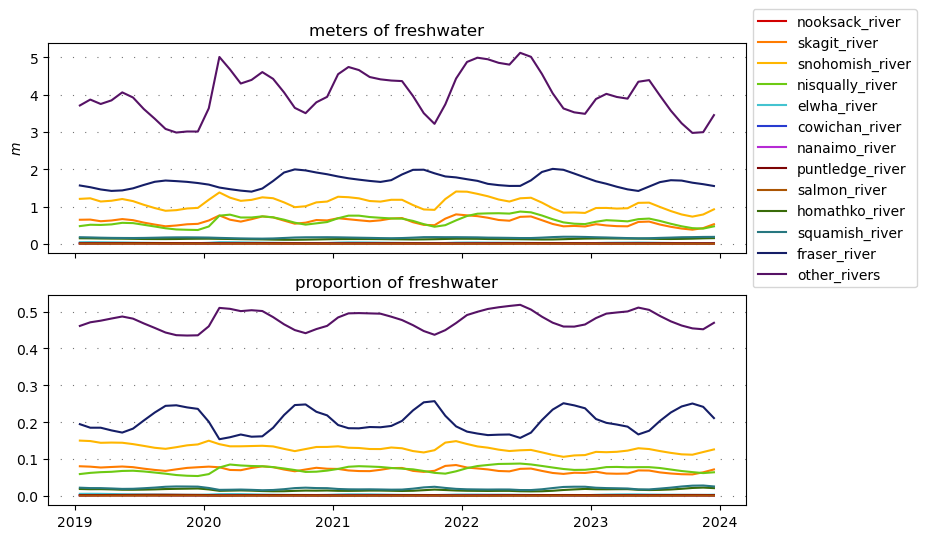

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys:
    ax[0].plot(meters1_all_mon['time'], meters1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')

    # ax[1].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    # ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    # ax[1].set_title('volume')
    # ax[1].set_ylabel(r'$m^3$')

    ax[1].plot(prop_all_mon['time'], prop_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    i += 1

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, '$m$')

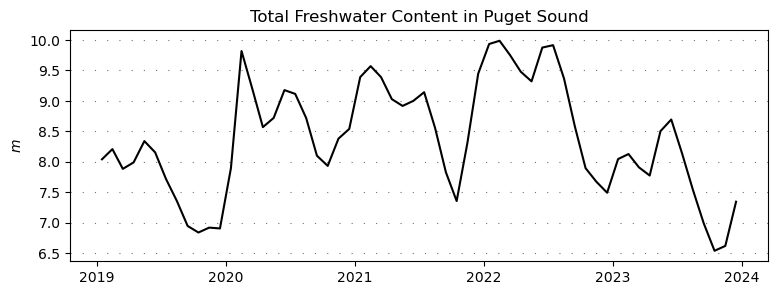

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)

total_meters_all_mon = meters1_all_mon.to_array().sum(dim="variable")
ax.plot(total_meters_all_mon['time'], total_meters_all_mon, color='black', linewidth=1.5)
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax.set_title('Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'$m$')

In [100]:
# fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# i = 0
# key = river_keys[0]
# ax[0].fill_between(meters1_all_mon['time'], meters1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
# ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
# ax[0].set_title('meters of freshwater')
# ax[0].set_ylabel(r'$m$')

# hold_prop = prop_all_mon[key]
# ax[1].fill_between(prop_all_mon['time'], hold_prop, label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
# ax[1].set_title('proportion of freshwater')
# ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

# i = 1
# for key in river_keys[1:]:
#     ax[0].fill_between(meters1_all_mon['time'], meters1_all_mon[river_keys[i]], meters1_all_mon[river_keys[i-1]], label=river_keys[i], color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
#     ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
#     ax[0].set_title('meters of freshwater')
#     ax[0].set_ylabel(r'$m$')

#     ax[1].plot(prop_all_mon['time'], prop_all_mon[river_keys[i]] + hold_prop, label=river_keys[i], color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
#     ax[1].set_title('proportion of freshwater')
#     ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

#     hold_prop = hold_prop + prop_all_mon[river_keys[i]]

#     i += 1

# ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Inter-annual meters/prop comparisons

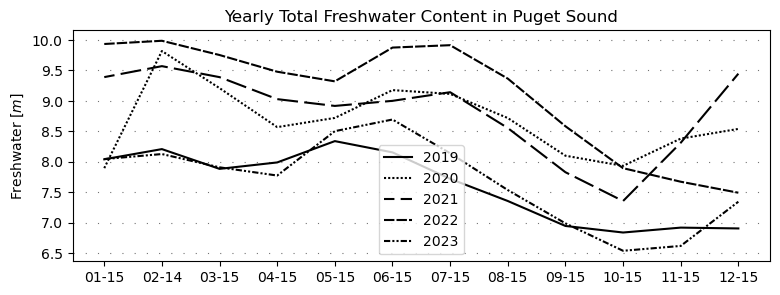

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)
ax.plot(meters1_2019_mon['time'].dt.strftime('%m-%d'), meters1_2019_mon.to_array().sum(dim="variable"), label='2019', linestyle=year_lines[0], color='k')
ax.plot(meters1_2020_mon['time'].dt.strftime('%m-%d'), meters1_2020_mon.to_array().sum(dim="variable"), label='2020', linestyle=year_lines[1], color='k')
ax.plot(meters1_2021_mon['time'].dt.strftime('%m-%d'), meters1_2021_mon.to_array().sum(dim="variable"), label='2021', linestyle=year_lines[2], color='k')
ax.plot(meters1_2022_mon['time'].dt.strftime('%m-%d'), meters1_2022_mon.to_array().sum(dim="variable"), label='2022', linestyle=year_lines[3], color='k')
ax.plot(meters1_2023_mon['time'].dt.strftime('%m-%d'), meters1_2023_mon.to_array().sum(dim="variable"), label='2023', linestyle=year_lines[4], color='k')
ax.legend()
ax.set_title('Yearly Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'Freshwater [$m$]')
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

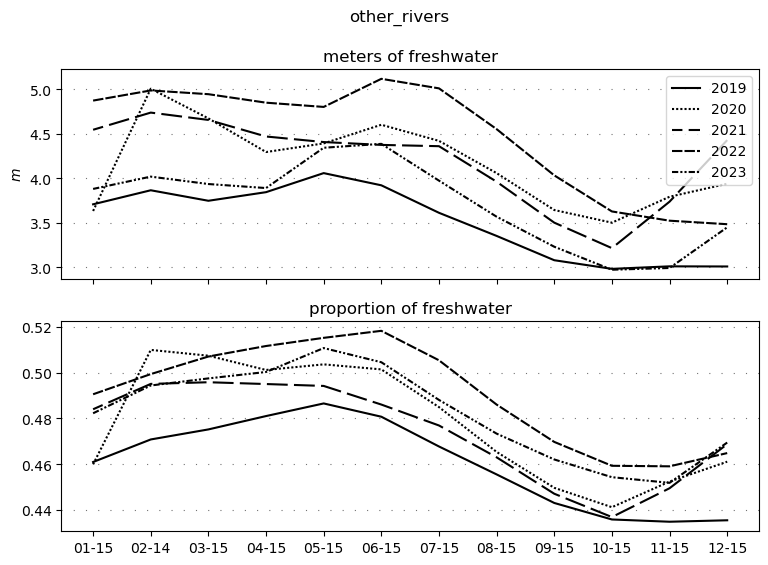

In [87]:
plot_river_years('other_rivers')

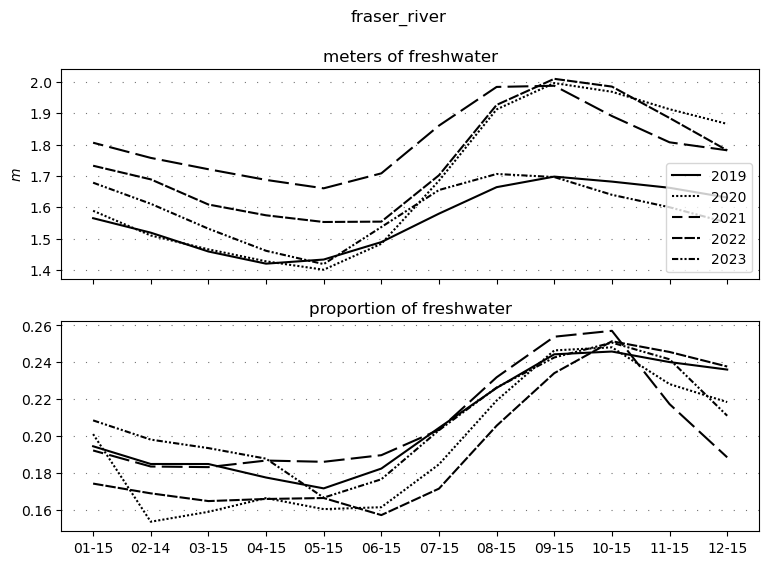

In [88]:
plot_river_years('fraser_river')  # interesting here: look at 2019 and 2023 where there are fewer meters of fw, but the proportion is the same

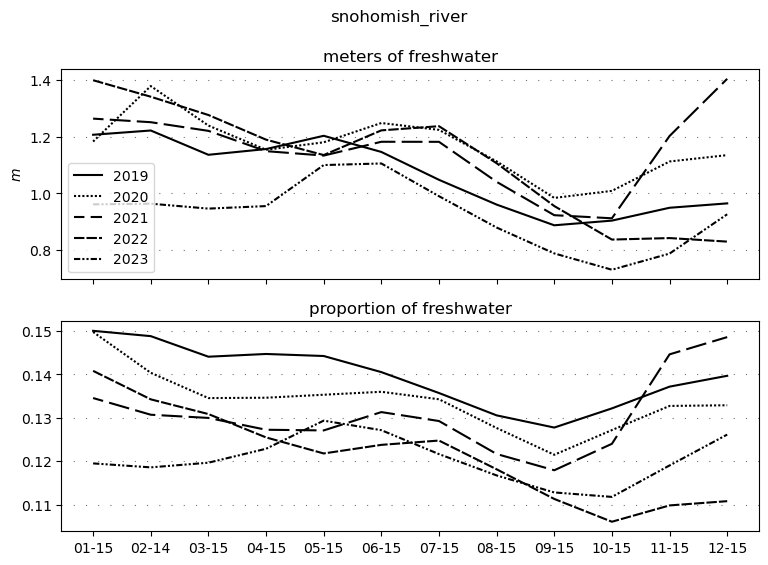

In [89]:
plot_river_years('snohomish_river')

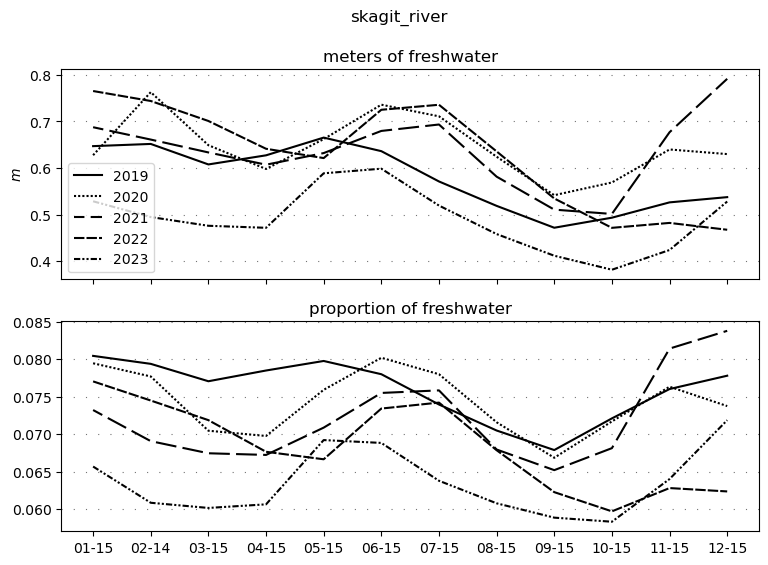

In [90]:
plot_river_years('skagit_river')

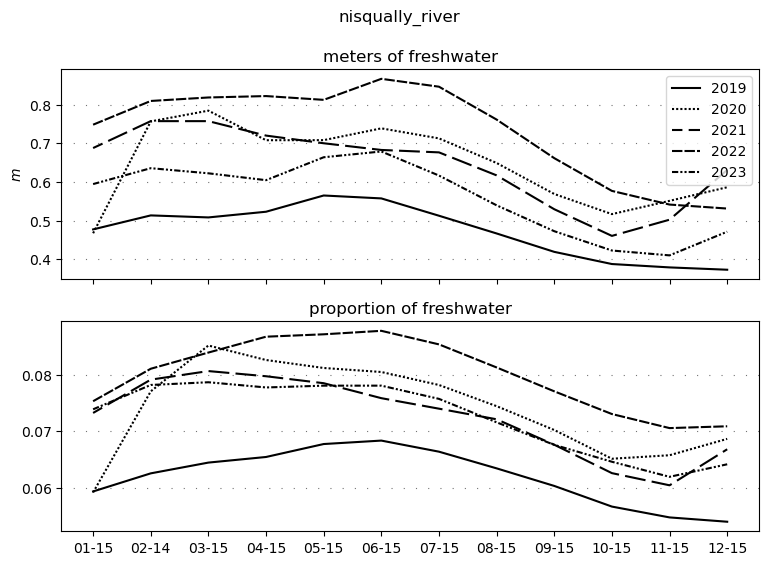

In [91]:
plot_river_years('nisqually_river')

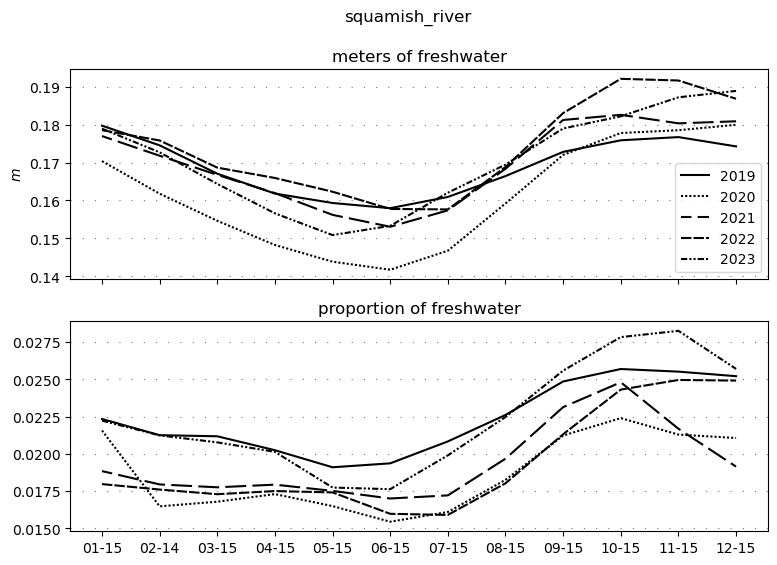

In [92]:
plot_river_years('squamish_river')

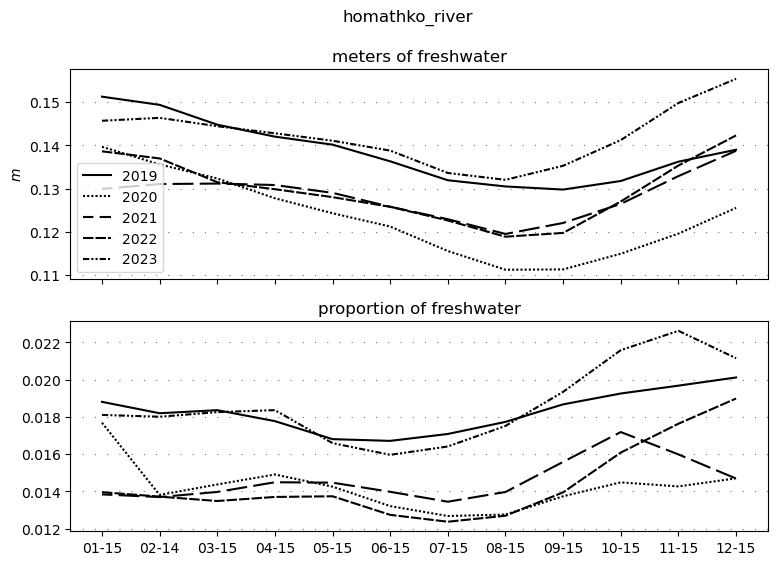

In [93]:
plot_river_years('homathko_river')  # interesting here that the homathko signal is much stronger in 2019 and 2023 both in prop and volume

## Daily

In [94]:
# dim1_2019 = make_1d(sum_2019, PS_all)

In [95]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# for key in river_keys:
#     dim1_2019[key].plot(label=key)

# ax.legend()